# Imports

In [178]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

In [179]:
df = pd.read_csv("tips.csv")
df.tail()

,total_bill,tip,sex,smoker,day,time,size
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2
243,18.78,3.00,Female,No,Thur,Dinner,2


# Preprocessing

In [180]:
df["sex"] = (df["sex"] == "Female").astype(int)
df["smoker"] = (df["smoker"] == "Yes").astype(int)
df["time"] = (df["time"] == "Dinner").astype(int)

df.tail()

,total_bill,tip,sex,smoker,day,time,size
239,29.03,5.92,0,0,Sat,1,3
240,27.18,2.00,1,1,Sat,1,2
241,22.67,2.00,0,1,Sat,1,2
242,17.82,1.75,0,0,Sat,1,2
243,18.78,3.00,1,0,Thur,1,2


In [181]:
df['day'].unique()

array(['Sun', 'Sat', 'Thur', 'Fri'], dtype=object)

In [182]:
df=pd.get_dummies(df,'day_',columns=['day'],dtype=int)
df.tail()

,total_bill,tip,sex,smoker,time,size,day__Fri,day__Sat,day__Sun,day__Thur
239,29.03,5.92,0,0,1,3,0,1,0,0
240,27.18,2.00,1,1,1,2,0,1,0,0
241,22.67,2.00,0,1,1,2,0,1,0,0
242,17.82,1.75,0,0,1,2,0,1,0,0
243,18.78,3.00,1,0,1,2,0,0,0,1


In [189]:
train, test, val = np.split(df.sample(frac=1), [int(len(df)*0.7), int(len(df)*0.8)])

def get_XY(df):

    Y = df.pop('tip')
    X = df

    return X,Y

/home/lord_raleigh/.local/lib/python3.11/site-packages/numpy/core/fromnumeric.py:57: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)


In [190]:
X_train,Y_train = get_XY(train)
X_test,Y_test = get_XY(test)
X_val,Y_val = get_XY(val)

X_train.shape

(170, 9)

# Model

In [191]:
normalizer = tf.keras.layers.Normalization(input_shape = (9,), axis=None)
normalizer.adapt(X_train)

In [201]:
model = tf.keras.Sequential(
    layers=[
        normalizer,
        tf.keras.layers.Dense(64,'elu'),
        tf.keras.layers.Dense(128,'elu'),
        tf.keras.layers.Dense(64,'elu'),
        tf.keras.layers.Dense(16,'elu'),
        tf.keras.layers.Dense(1,'relu'),
    ]
)

model.compile(tf.keras.optimizers.Adam(0.001),'mean_squared_error')

history = model.fit(X_train,Y_train,20,200,1, validation_data=(X_val,Y_val))

Epoch 1/200
9/9 [==============================] - 1s 15ms/step - loss: 4.4771 - val_loss: 1.1183
Epoch 2/200
9/9 [==============================] - 0s 7ms/step - loss: 1.4772 - val_loss: 0.8059
Epoch 3/200
9/9 [==============================] - 0s 5ms/step - loss: 1.1637 - val_loss: 1.0003
Epoch 4/200
9/9 [==============================] - 0s 6ms/step - loss: 1.0622 - val_loss: 0.8342
Epoch 5/200
9/9 [==============================] - 0s 4ms/step - loss: 1.0303 - val_loss: 0.8227
Epoch 6/200
9/9 [==============================] - 0s 4ms/step - loss: 0.9848 - val_loss: 0.8424
Epoch 7/200
9/9 [==============================] - 0s 4ms/step - loss: 1.0189 - val_loss: 0.8446
Epoch 8/200
9/9 [==============================] - 0s 6ms/step - loss: 0.9912 - val_loss: 0.8490
Epoch 9/200
9/9 [==============================] - 0s 12ms/step - loss: 1.0191 - val_loss: 0.8820
Epoch 10/200
9/9 [==============================] - 0s 6ms/step - loss: 0.9849 - val_loss: 0.8292
Epoch 11/200
9/9 [=========

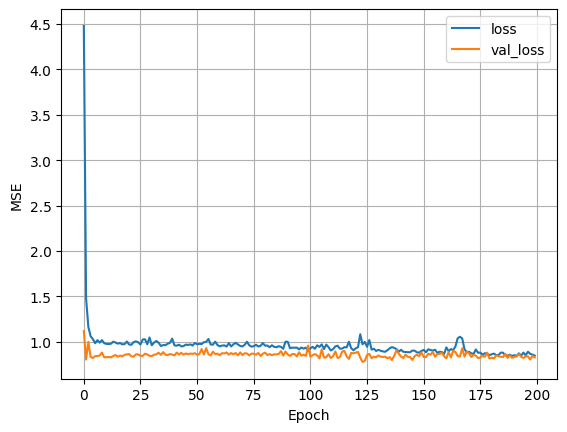

In [202]:
def plot_loss(history):
  plt.plot(history.history['loss'], label='loss')
  plt.plot(history.history['val_loss'], label='val_loss')
  plt.xlabel('Epoch')
  plt.ylabel('MSE')
  plt.legend()
  plt.grid(True)
  plt.show()

plot_loss(history)

In [204]:
Y_pred = model.predict(X_test)

t = 1 # Put any index to compare the prediction and actual

print((Y_pred[t][0]),np.array(Y_test)[t])

1/1 [==============================] - 0s 27ms/step
2.1494825 2.0
